In [3]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

# logging.basicConfig(level=logging.WARNING)
logging.basicConfig(level=logging.WARNING)
import shnitsel as st

## Basic datasheet test

We want to illustrate the basic overview provided by our default `Datasheet` visualization. 

We first load some datasets:

In [5]:
from shnitsel.data.tree import ShnitselDB, CompoundInfo
from shnitsel.data.dataset_containers import Trajectory

shnitsel_db: ShnitselDB = st.io.read('test_data/sharc/traj_I01_v2.0/', parallel=True).set_charge(1).set_compound_info("I01")  # type: ignore
shnitsel_db_triplet: ShnitselDB = st.io.read(
    'test_data/sharc/traj_I01_v3.0_triplets/', parallel=True
).set_charge(1).set_compound_info("I01")  # type: ignore
shnitsel_db_full: ShnitselDB[Trajectory] = st.io.read(
    'test_data/sharc/traj_I01_v3.0_triplets_nacs_socs/', parallel=True
).set_charge(1).set_compound_info("I01")  # type: ignore


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

We first generate a datasheet illustrating a dataset with some triplet data

/home/tpadmin/git/shnitsel-tools-official/shnitsel/data/traj_combiner_methods.py:491: FutureWarning: In a future version of xarray the default value for compat will change from compat='equals' to compat='override'. This change will result in the following ValueError: Cannot specify both coords='different' and compat='override'. The recommendation is to set compat explicitly for this case.
  frames = xr.concat(
Written: 100%|██████████| 1/1 [00:02<00:00,  2.81s/page]


{'/I01/agg/': [<Figure size 827x974.167 with 13 Axes>,
  <Figure size 827x974.167 with 13 Axes>,
  <Figure size 827x1169 with 7 Axes>]}

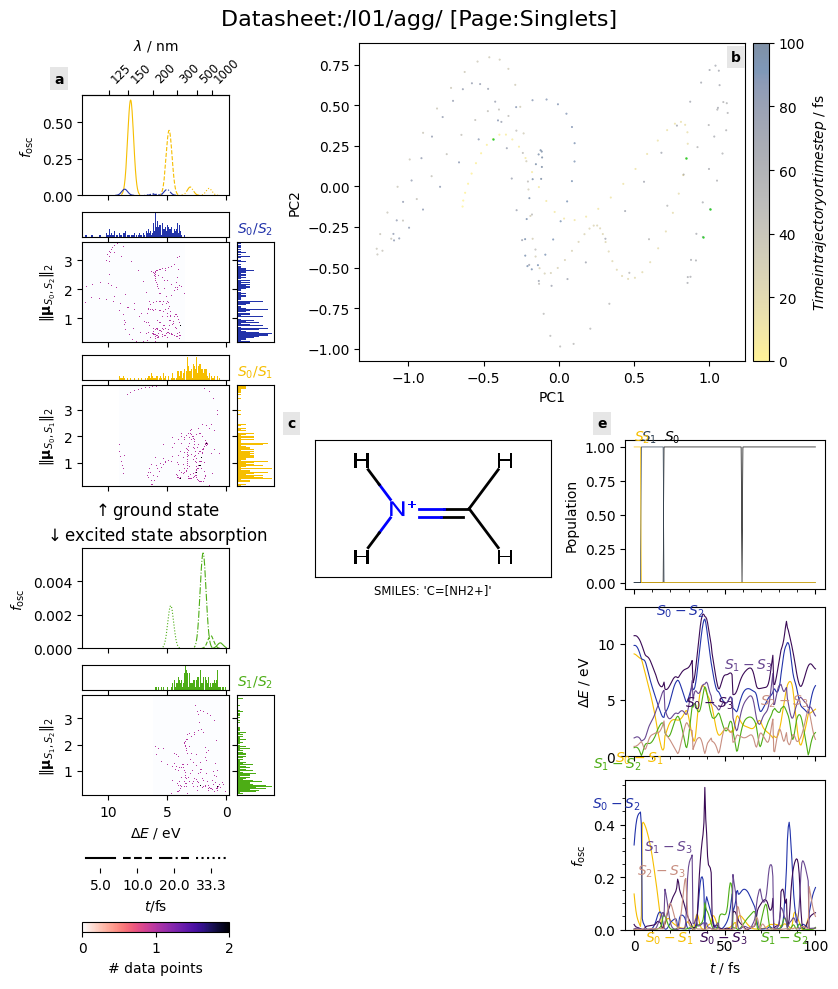

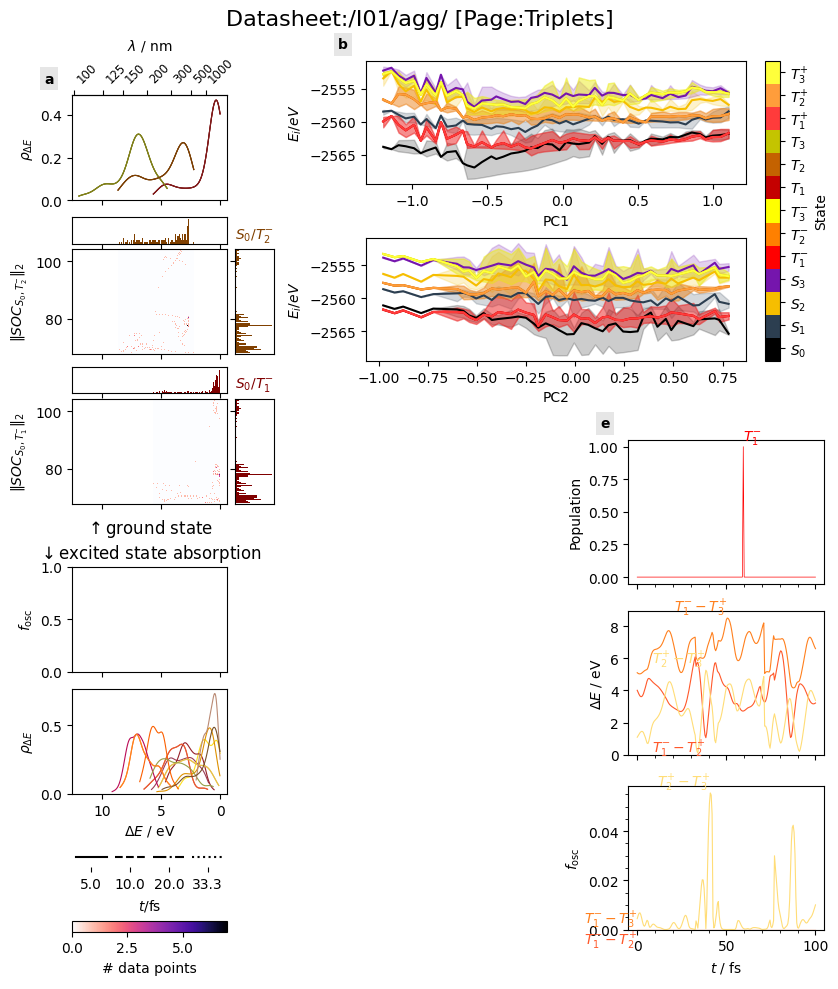

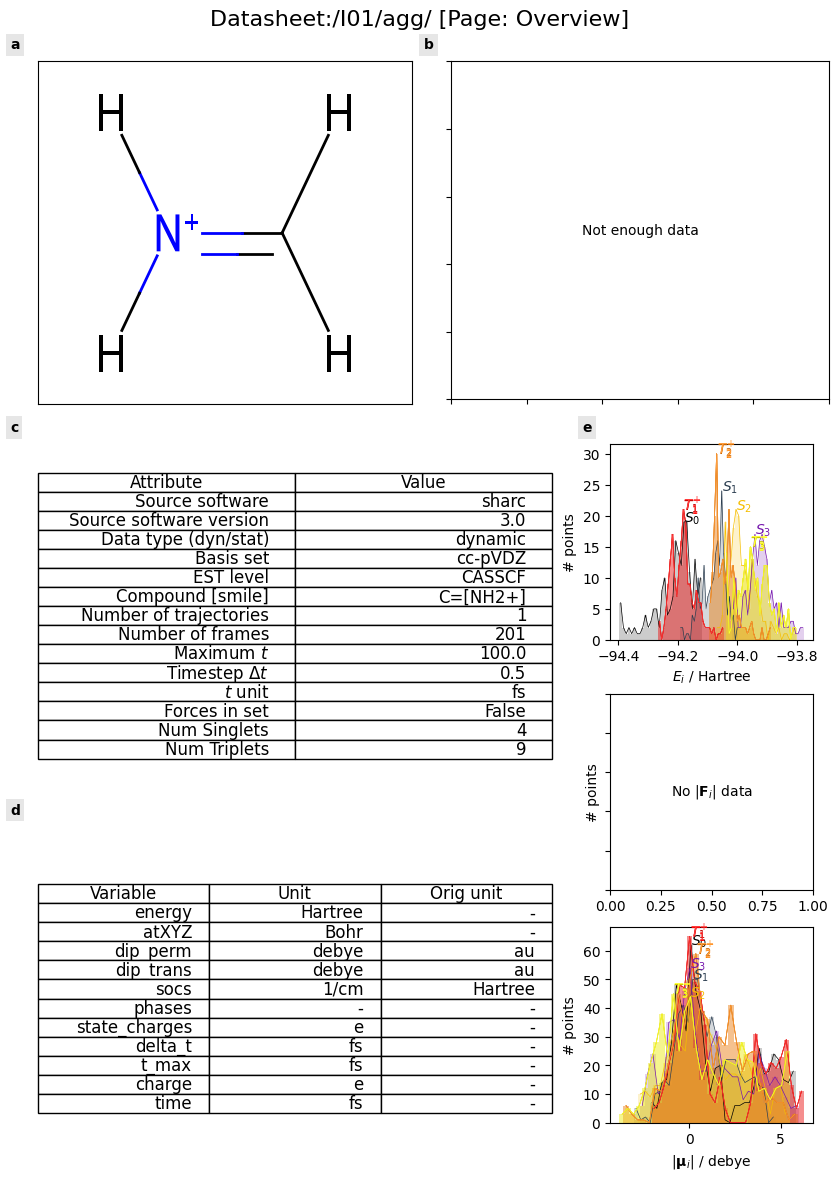

In [6]:
from shnitsel.vis.datasheet import Datasheet

sheet = Datasheet(shnitsel_db_triplet)
sheet.plot(
    include_meta_page=True, include_coupling_page=False, path="./triplet_sharc.pdf"
)

Let us now perform some basic filtering and generate the datasheet for a cleaned dataset including more encompassing data.

/home/tpadmin/git/shnitsel-tools-official/shnitsel/data/traj_combiner_methods.py:491: FutureWarning: In a future version of xarray the default value for compat will change from compat='equals' to compat='override'. This change will result in the following ValueError: Cannot specify both coords='different' and compat='override'. The recommendation is to set compat explicitly for this case.
  frames = xr.concat(
/home/tpadmin/git/shnitsel-tools-official/.venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/tpadmin/git/shnitsel-tools-official/.venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/tpadmin/git/shnitsel-tools-official/.venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multipl

{'/I01/agg/': [<Figure size 827x974.167 with 15 Axes>,
  <Figure size 827x974.167 with 15 Axes>,
  <Figure size 650x650 with 169 Axes>,
  <Figure size 827x1169 with 8 Axes>,
  <Figure size 827x1169 with 7 Axes>]}

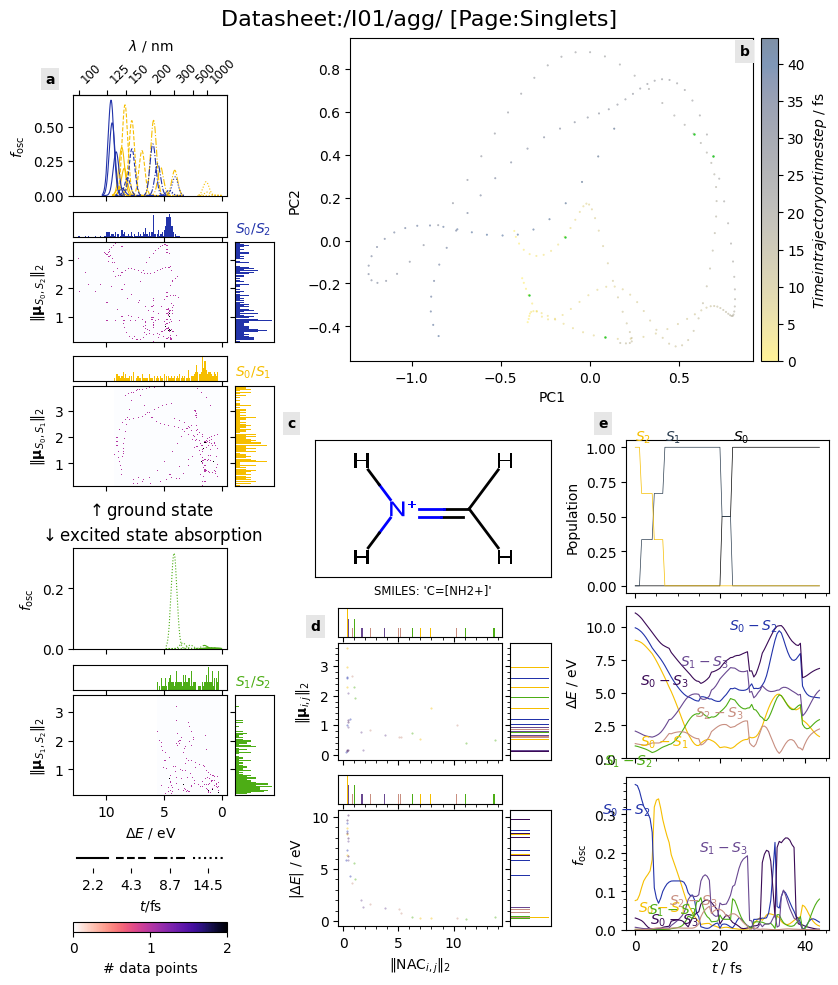

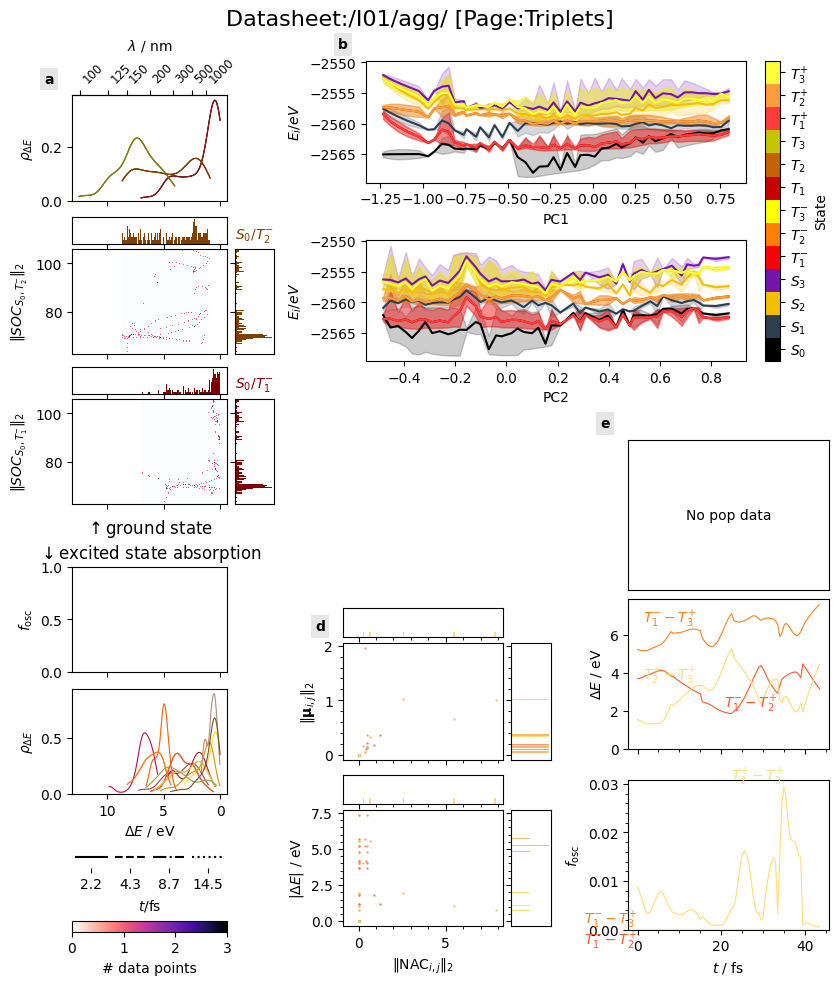

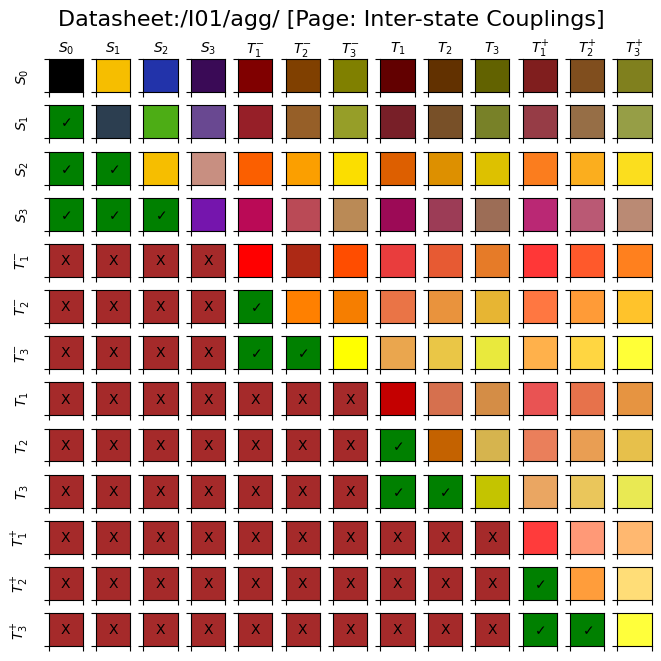

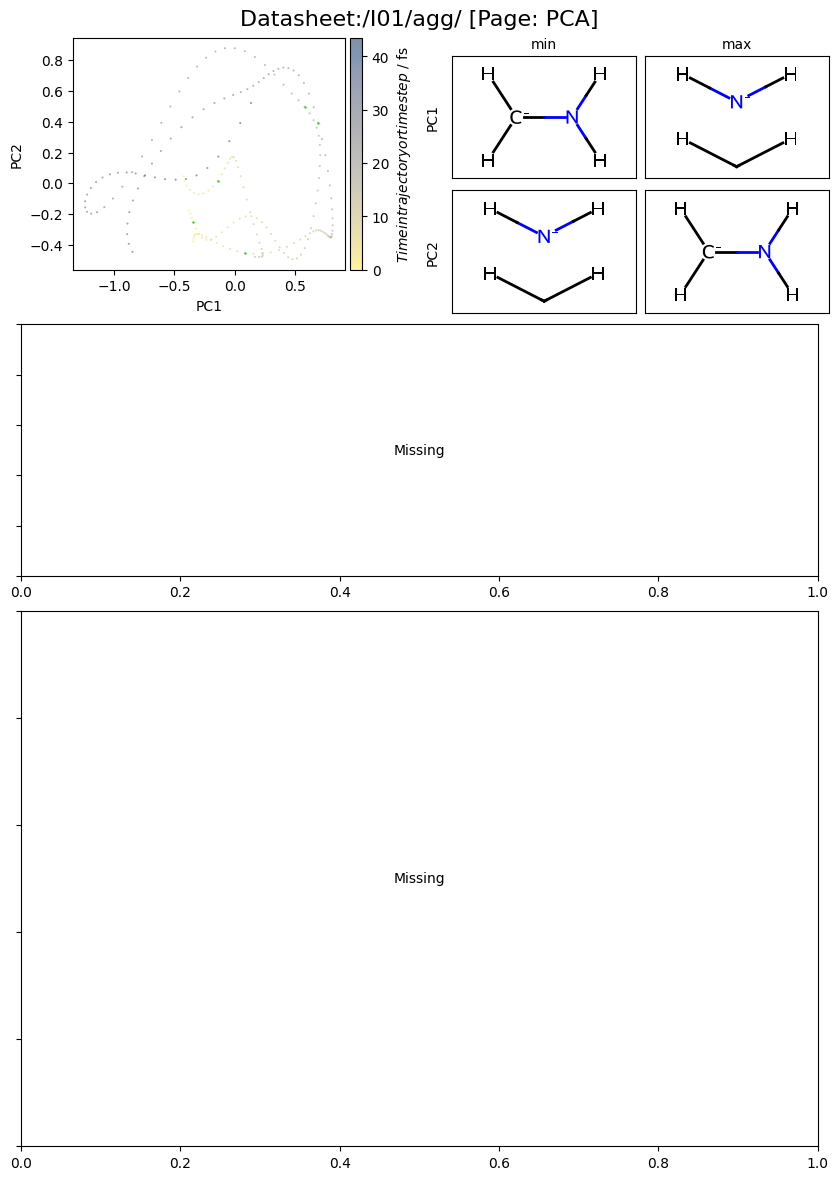

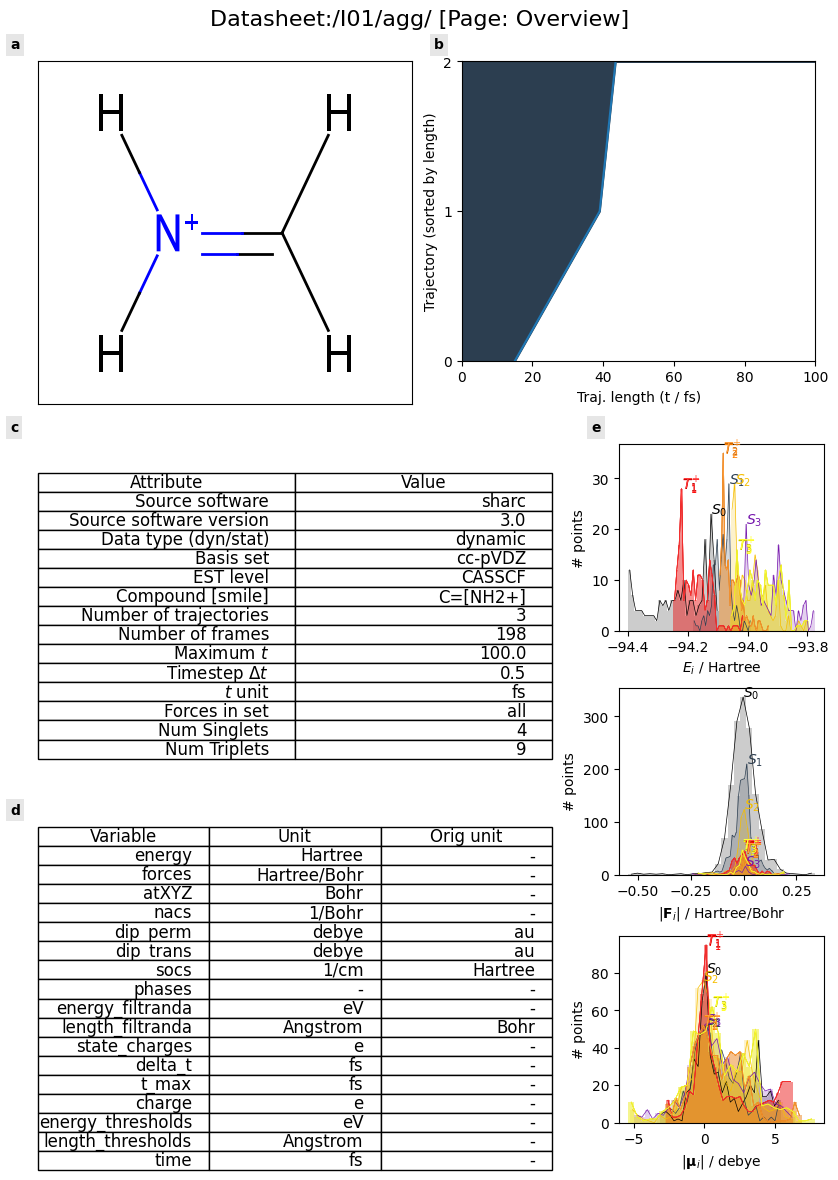

In [7]:
from shnitsel.clean import sanity_check
sheet = Datasheet(sanity_check(shnitsel_db_full, drop_empty_trajectories=True))
# sheet.datasheet_pages['root'].charge = 1
sheet.plot(
    include_pca_page=True, include_meta_page=True, path="./triplet_sharc_full.pdf"
)
# sheet.plot( path="./triplet_sharc_full.pdf")
# sheet.datasheet_pages
# sheet.datasheet_pages[list(sheet.datasheet_pages.keys())[0]].per_state

Once the data underlying the data sheet has been generated, data is cached and re-plotting will not take as much time as can be seen by timing the below calls.
Note that it is possible to plot individual plots of the datasheet if so desired.
This saves time compared to the generation of a full datasheet which performs various analyses by default.

In [8]:
%time sheet.calc_all()

CPU times: user 1.77 ms, sys: 0 ns, total: 1.77 ms
Wall time: 11.7 ms


[21:35:51] WARNING: Proton(s) added/removed



CPU times: user 345 ms, sys: 6 ms, total: 351 ms
Wall time: 347 ms


[{'energy': <Axes: label='energy', xlabel='$E_i$ / Hartree'>,
  'forces': <Axes: label='forces', xlabel='$|\\mathbf{F}_i|$ / Hartree/Bohr'>,
  'dip_perm': <Axes: label='dip_perm', xlabel='$|\\mathbf{\\mu}_i|$ / debye'>}]

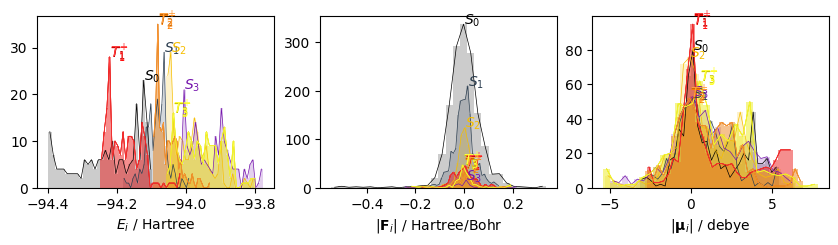

In [9]:
%time sheet.plot_per_state_histograms()

CPU times: user 126 ms, sys: 6.99 ms, total: 133 ms
Wall time: 132 ms


[{'pop': <Axes: label='pop', ylabel='Population'>,
  'de': <Axes: label='de', ylabel='$\\Delta E$ / eV'>,
  'ft': <Axes: label='ft', xlabel='$t$ / fs', ylabel='$f_\\mathrm{osc}$'>}]

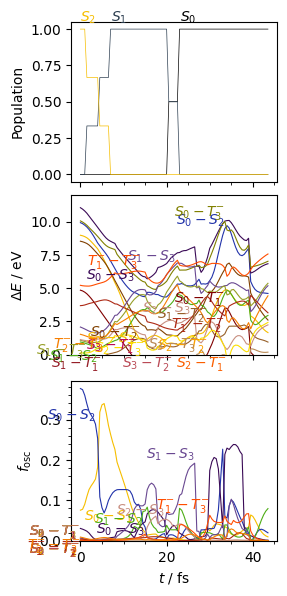

In [10]:
%time sheet.plot_timeplots()

CPU times: user 1.2 s, sys: 6.97 ms, total: 1.21 s
Wall time: 1.21 s


[{'sg': <Axes: label='sg', ylabel='$f_\\mathrm{osc}$'>,
  't0': <Axes: label='t0', ylabel='$\\|\\mathbf{\\mu}_{S_{0},S_{2}}\\|_2$'>,
  't1': <Axes: label='t1', ylabel='$\\|\\mathbf{\\mu}_{S_{0},S_{1}}\\|_2$'>,
  'se': <Axes: label='se', title={'center': '$\\uparrow$ground state\n$\\downarrow$excited state absorption'}, ylabel='$f_\\mathrm{osc}$'>,
  't2': <Axes: label='t2', xlabel='$\\Delta E$ / eV', ylabel='$\\|\\mathbf{\\mu}_{S_{1},S_{2}}\\|_2$'>,
  'legend_spec': <Axes: label='legend_spec', xlabel='$t$/fs'>,
  'cb_hist': <Axes: label='cb_hist', xlabel='# data points'>}]

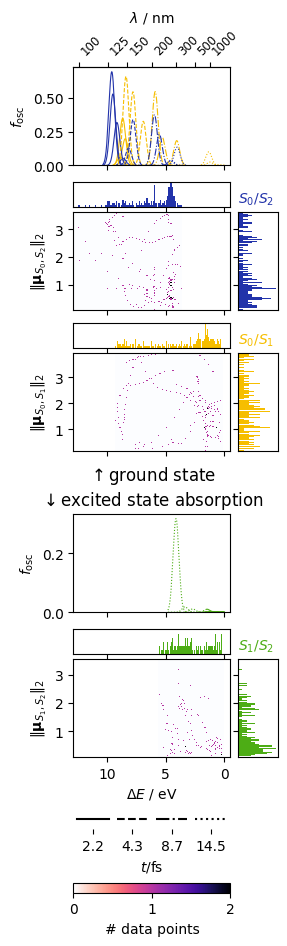

In [11]:
%time sheet.plot_separated_spectra_and_hists()

100%|██████████| 78/78 [00:00<00:00, 365.30it/s]


CPU times: user 13.4 s, sys: 99.8 ms, total: 13.5 s
Wall time: 8.81 s


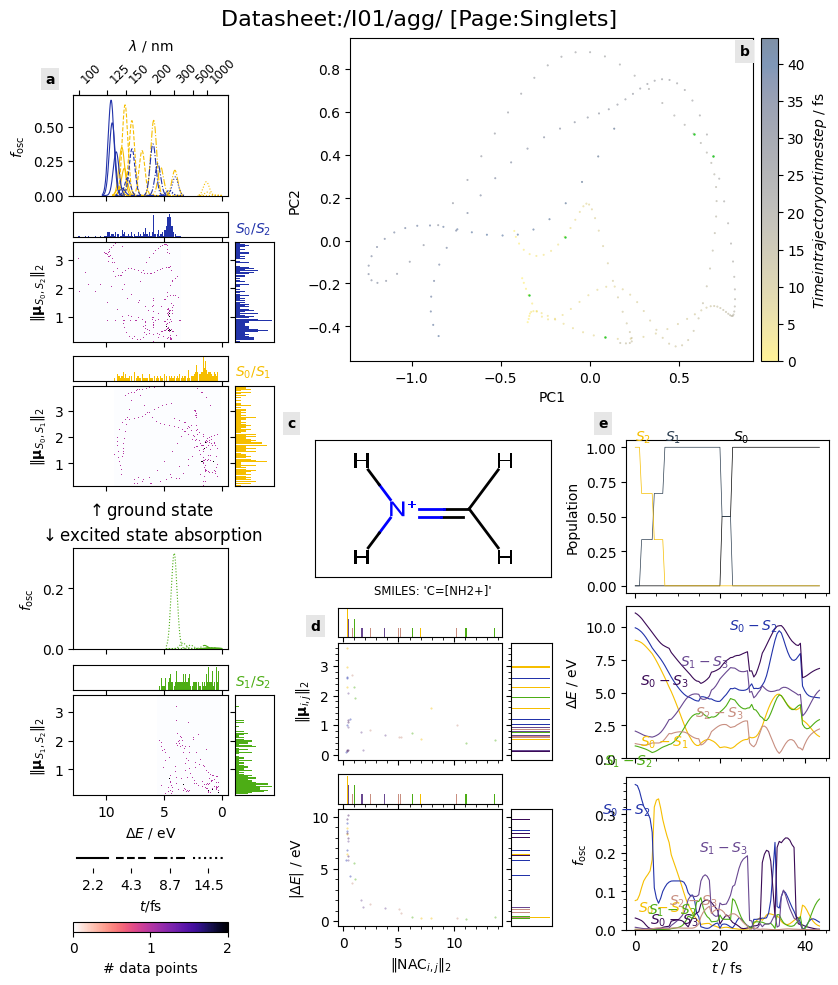

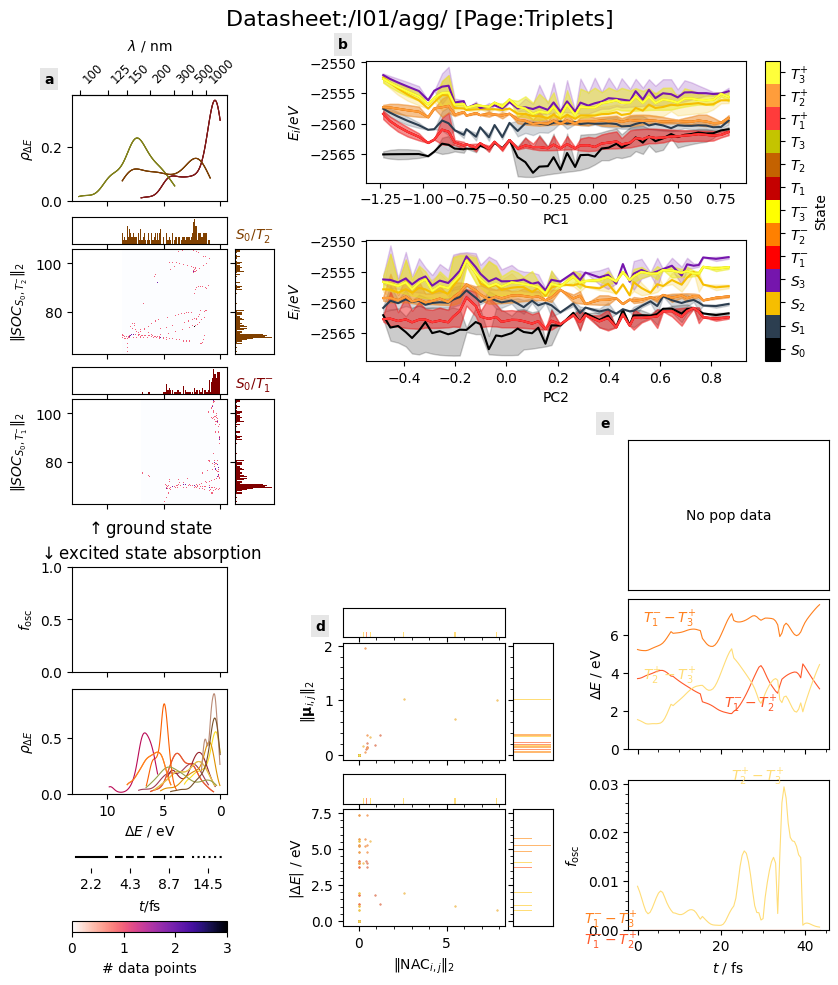

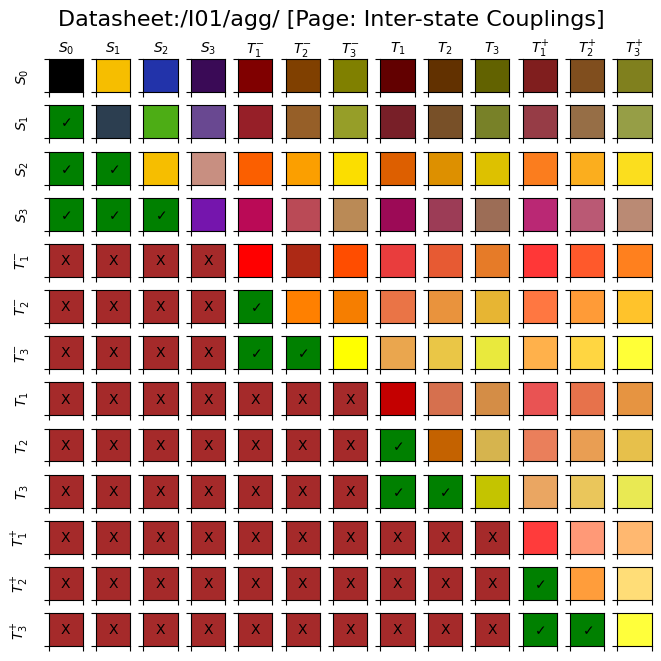

In [12]:
%time fig = sheet.plot()

For small dataset, datasheet generation is generally quick. Note, however, that for vast datasets, the generation of a datasheet can take several minutes.